
# Single Value Decomposition (SVD)

SVD puede ser usado en el contexto de imágenes para comprimir fotos. Si en lugar de guardar la foto entera (Matriz M de la clase), uno guardase una representación reducida de esta matriz (B) y la manera de pasar de un espacio a otro (V*), entonces un se podría ahorrar mucho espacio en el guardado de la foto. Este mismo proceso se utiliza a veces en imágenes y señales para reducir el ruido de las mismas (proceso llamdo denoising)

Primero cargamos la foto. Para eso vamos a usar el dataset `sample_images` de Sklearn.

In [ ]:
# Cargamos librerías

# Cargar imágenes de muestra.
from sklearn.datasets import load_sample_image #cargar imágenes de muestra.

# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

# Manipulación de imágenes
from PIL import Image

# Operaciones matemáticas y manipulacion de datos
import numpy as np
import pandas as pd

# Mostrar las gráficas directamente en la celda
%matplotlib inline

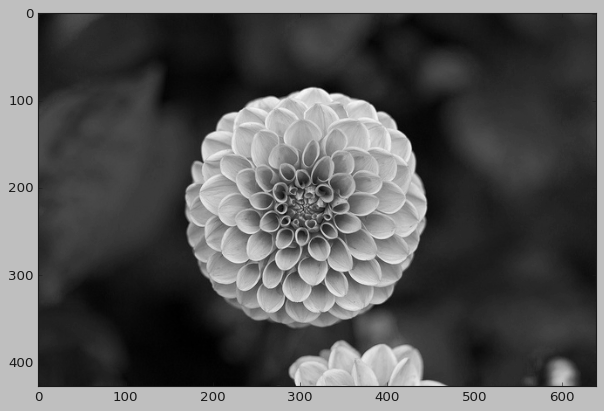

In [ ]:
# Estilo estético de gráficas
plt.style.use('classic')

# Cargar imagen
img = load_sample_image("flower.jpg")

# Convierte la imagen a escala de grises promediando los valores de los canales de color (R, G, B).
image_grayscale = img.mean(axis=2).astype(np.float32)

# Imprimir imagen con matplotlib
plt.figure(figsize=(9, 6))
plt.imshow(image_grayscale, cmap='gray')
plt.show()

In [ ]:
#forma (dimensiones) de la matriz 'image_grayscale'.
image_grayscale.shape

(427, 640)

Vamos a usar la versión clasica del algoritmo de SVD que viene en numpy.

In [ ]:
# Descomposición en Matrices U, D (Sigma) y V de la imagen en escala de grises
U, D, V = np.linalg.svd(image_grayscale)

Inspeccionemos la dimensión de los elementos:

In [ ]:
image_grayscale.shape

(427, 640)

In [ ]:
U.shape

(427, 427)

In [ ]:
D.shape

(427,)

In [ ]:
V.shape

(640, 640)

Así como está, si multiplicamos adecuadamente estos tres elementos, recuperariamos la foto original. Veamos que si tomamos todos los valores singulares tendremos la imagen original nuevamente:

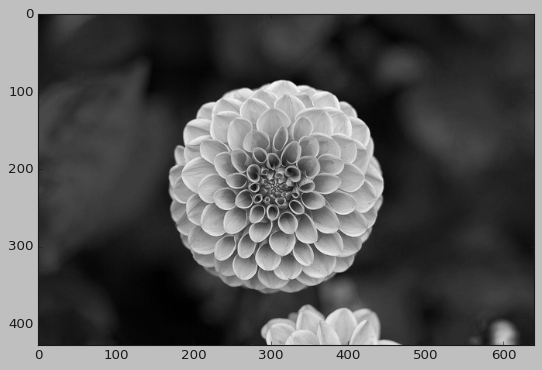

In [ ]:
# Reconstruye la imagen usando los primeros 427 vectores singulares de U y V

reconstimg = np.matrix(U[:, :427]) * np.diag(D[:427]) * np.matrix(V[:427, :])
plt.imshow(reconstimg, cmap='gray')
plt.show()

El objetivo pasa por tomar unicamente los valores singulares mas altos de la matriz D (Sigma). Por una cuestión de comodidad, los valores en D ya están ordenados de menor a mayor, siendo los primeros los de mayor valor. Podemos probar tomando menos valores singulares:

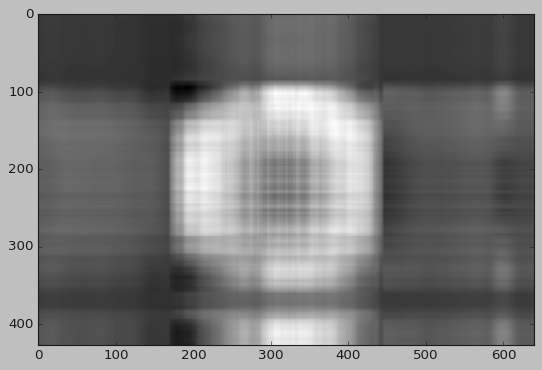

In [ ]:
# Reconstruye la imagen usando solo los primeros 2 vectores de las matrices U (columnas) y V (filas),
#  y los primeros 2 valores singulares de la matriz D (Sigma)

reconstimg = np.matrix(U[:, :2]) * np.diag(D[:2]) * np.matrix(V[:2, :])
plt.imshow(reconstimg, cmap='gray')
plt.show()

In [ ]:
reconstimg.reshape(reconstimg.size) # Cambia la forma de la imagen reconstruida a un vector unidimensional

matrix([[18.597492, 18.720106, 18.766275, ..., 47.60921 , 47.94834 ,
         48.16192 ]], dtype=float32)

Ya comenzamos a visualizar al menos un objeto en el centro de la imagen, para tener tan poca información, esta bien. Vamos a tomar una cantidad mas relevante de valores singulares:

In [ ]:
A = reconstimg.reshape((reconstimg.size,)) # 'A' es el vector unidimensional de la imagen reconstruida.
A.shape

(1, 273280)

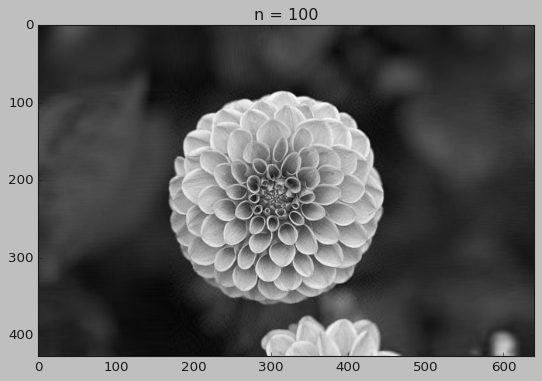

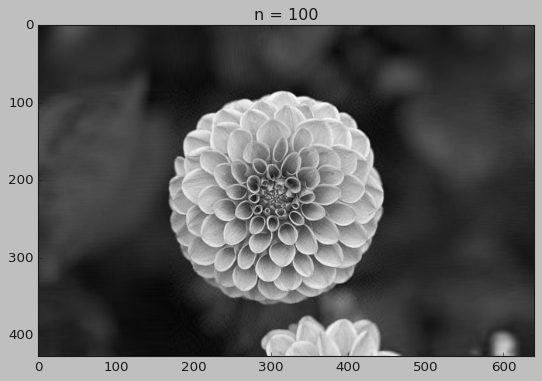

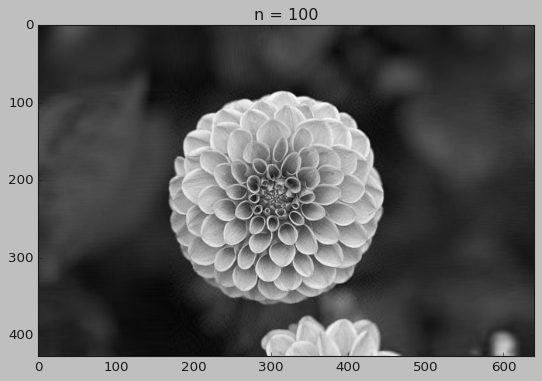

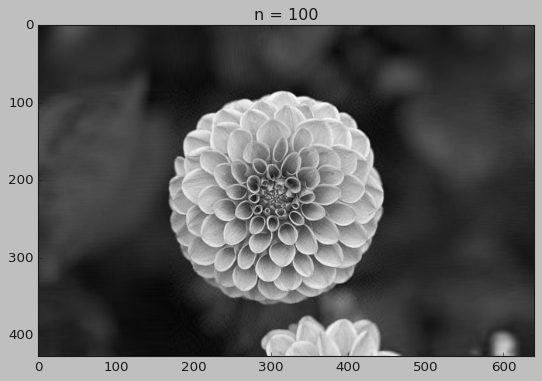

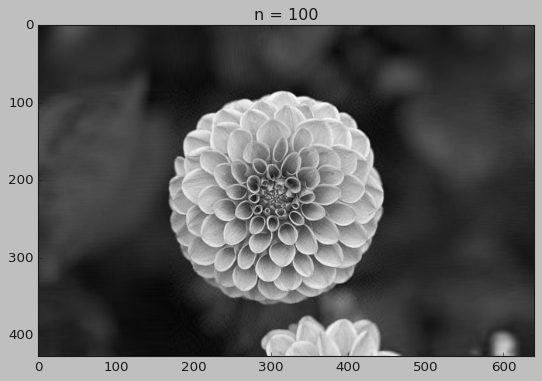

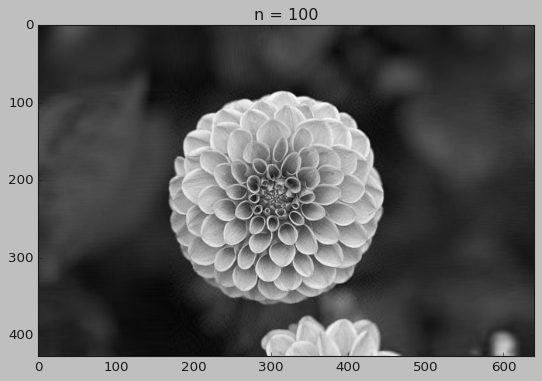

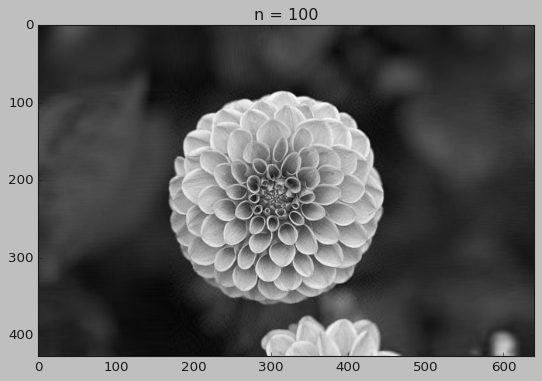

In [ ]:
 # Se muestra la imagen reconstruida para varios valores de n (número de valores singulares utilizados en la reconstrucción)

for n in [5, 10, 15, 20, 30, 50,100]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

# Principal Component Analysis

PCA es uno de los algortimos más utilizados para reducir la dimensionalidad de un dataset. Cuando aumenta la dimensionalidad de los datos, el volumen del espacio aumenta exponencialmente, haciendo que los datos disponibles se encuentren más dispersos.

El PCA selecciona las direcciones con mayor variabilidad. Permitiendo eliminar las direcciones con menor variabilidad, ya que poseen menos información.

Utilizaremos el dataset Iris y veamos primero como se ve si graficamos los datos utilizando solo dos features.

In [ ]:
#Importación de librerías necesarias: Machine learning, análisis de datos y visualización


# Machine learning
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Análisis de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Se carga el conjunto de datos Iris desde la librería sklearn.

iris = load_iris()

X = iris.data
y = iris.target
features = iris.feature_names

# Se crea un DataFrame con los datos y se añade una columna para la codificacion de las especies.
df = pd.DataFrame(X, columns=features)
df['Label'] = y
df['Species']=df['Label'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

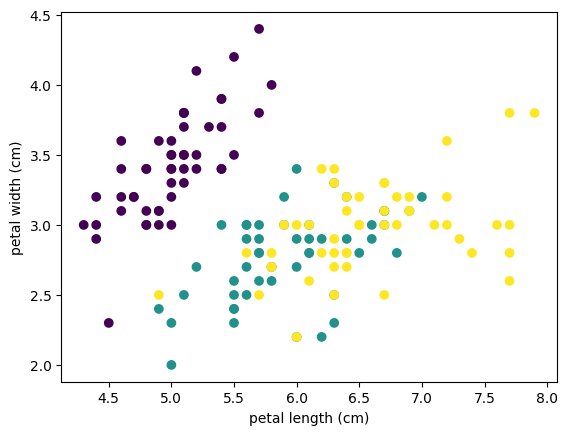

In [ ]:
# Se crea scatter plot de las características 1º y 2º (largo y ancho del sétalo)
# Los colores hacen referencia a las distintas especies

plt.style.use('default')
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(features[2])
plt.ylabel(features[3])
plt.show()


# Podemos ver que las carcterísticas de largo y ancho del sétalo no son útiles para separar especies

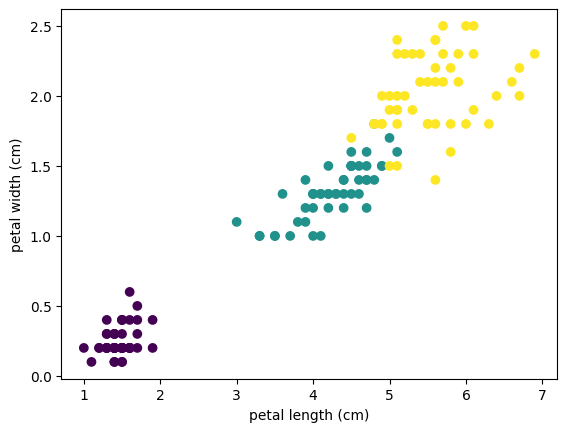

In [ ]:
# Se crea scatter plot de las características 3º y 4º (largo y ancho del pétalo)
# Los colores hacen referencia a las distintas especies

plt.scatter(X[:, 2], X[:, 3], c=y)
plt.xlabel(features[2])
plt.ylabel(features[3])
plt.show()


# Podemos ver que las carcterísticas de largo y ancho del pétalo son útiles para separar especies

Ahora utilizemos el analisis de componentes principales para capturar la información de las cuatro dimensiones en solo dos.

In [ ]:
# Se aplica PCA para reducir el total de dimensiones (características) a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Se añade la información de los componentes principales al DataFrame original
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_merged = pd.merge(df, pca_df, right_index=True, left_index=True)

In [ ]:
pca_df

,PC1,PC2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


In [ ]:
# Imprimir la varianza explicada por cada componente principal
print('Varianza explicada')
for i in range(2):
    print('PC{}: {}'.format(i+1, pca.explained_variance_ratio_[i]))

Varianza explicada
PC1: 0.9246187232017271
PC2: 0.05306648311706782


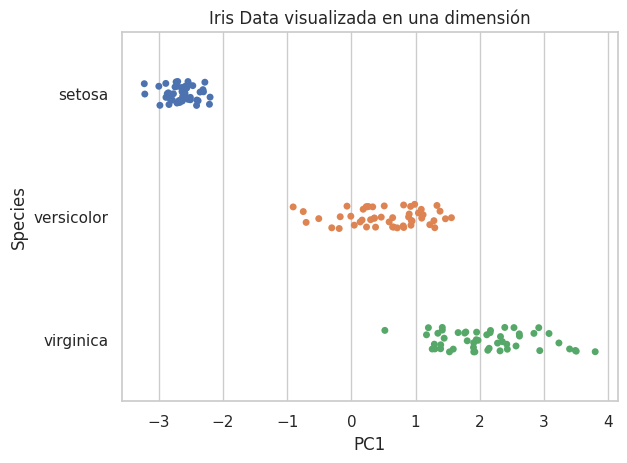

In [ ]:
# Visualizaciones de los datos transformados en el espacio del 1º componente principal (PC1) (93% de la variabilidad)

sns.set(style="whitegrid")
sns.stripplot(x="PC1", y="Species", data=df_merged, jitter=True, hue="Species")
plt.title('Iris Data visualizada en una dimensión')
plt.show()

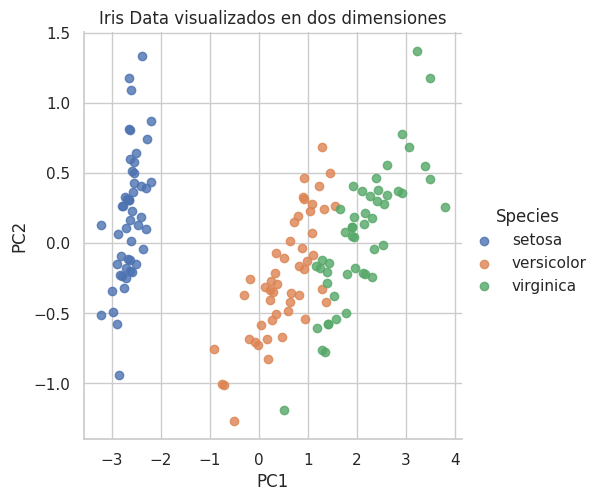

In [ ]:
# Visualizaciones de los datos transformados en el espacio de la 1º y 2º componente principal (PC 2 agrega 5% de la variabilidad explicada por PC1)

sns.lmplot(x='PC1', y='PC2', data=df_merged, fit_reg=False, hue='Species')
plt.title('Iris Data visualizados en dos dimensiones')
plt.show()

Un **Biplot** es una representación gráfica que muestra tanto las observaciones (muestras) como las variables (características) en el espacio de los componentes principales obtenidos mediante Análisis de Componentes Principales (PCA). Es útil para entender la estructura interna de los datos y la relación entre las variables.

En un biplot, se representan:

* Puntos: Representan las observaciones en el espacio de los componentes principales.

* Flechas: Representan las variables originales. La dirección y longitud de las flechas indican cómo se alinean las variables con los componentes principales. Las flechas que apuntan en la misma dirección que los componentes principales tienen una fuerte correlación con esos componentes.

Cómo leer un biplot:

* Puntos cercanos: Observaciones que están cerca unas de otras tienen características similares.

* Flechas largas: Variables con flechas más largas tienen una mayor varianza y son más importantes para ese componente principal.

* Ángulo entre flechas: Si el ángulo entre dos flechas es pequeño, significa que las variables están altamente correlacionadas positivamente. Si es grande (cerca de 180 grados), están correlacionadas negativamente. Un ángulo de 90 grados sugiere que las variables no están correlacionadas.

In [ ]:
#Se define una función biplot para visualizar el biplot de los componentes principales.

def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley, color="#c7e9c0", edgecolor="#006d2c", alpha=0.5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color='#253494',alpha=0.5,lw=2)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color="#000000", ha="center", va="center")
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color="#000000", ha="center", va="center")
    plt.xlim(-.75,1)
    plt.ylim(-0.5,1)
    plt.grid(False)
    plt.xticks(np.arange(0, 1, 0.5), size=12)
    plt.yticks(np.arange(-0.75, 1, 0.5), size=12)
    plt.xlabel("Component 1", size=14)
    plt.ylabel("Component 2", size=14)
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)



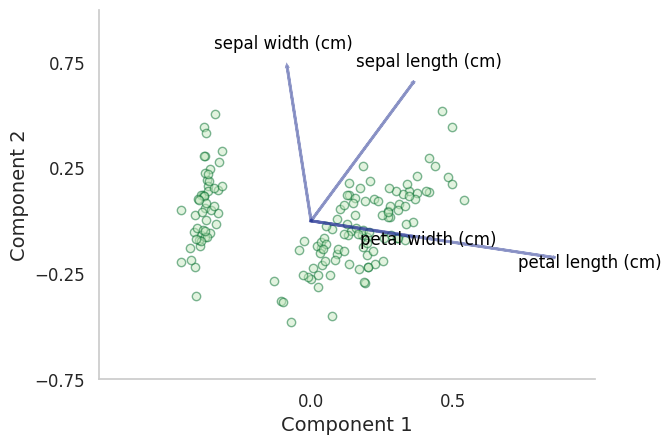

In [ ]:
# Generación y visualización del biplot
array_pca = np.array(pca_df)
biplot(array_pca[:, 0:2], np.transpose(pca.components_[0:2, :]), labels=df.columns)

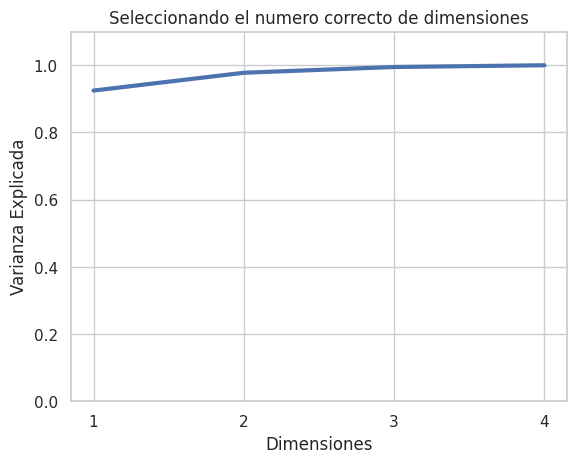

In [ ]:
#Se calcula y visualiza la varianza explicada acumulada para determinar el número óptimo de componentes principales

pca_test = PCA()
pca_test.fit(X)

cumsum = np.cumsum(pca_test.explained_variance_ratio_)
dim = np.arange(len(cumsum)) + 1

plt.plot(dim, cumsum, '-', lw=3);

plt.xlabel('Dimensiones')
plt.ylabel('Varianza Explicada')
plt.title('Seleccionando el numero correcto de dimensiones')

plt.xticks([1, 2, 3, 4])
plt.ylim([0, 1.1]);